## VISUALIZACION I

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('attacks1.csv')

- Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1) ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [70]:
sexo =df['sex'].value_counts
sexo

<bound method IndexOpsMixin.value_counts of 0         F
1         F
2         M
3         M
4         M
       ... 
6109    NaN
6110      M
6111      M
6112    NaN
6113      N
Name: sex, Length: 6114, dtype: object>

In [72]:
valores = df['sex'].unique()
valores

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [41]:
z=[]

for i in sexo:
    if i == 'M':
        z.append(i)
    elif i == 'F':
        z.append(i)
    else:
        pass

In [51]:
x = pd.DataFrame(z)
x1=x.value_counts()

KeyError: 'sex'

In [67]:
x.head()

AttributeError: 'list' object has no attribute 'head'

In [44]:
y = pd.DataFrame(z)
y1 =y.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

TypeError: 'value' must be an instance of str or bytes, not a float

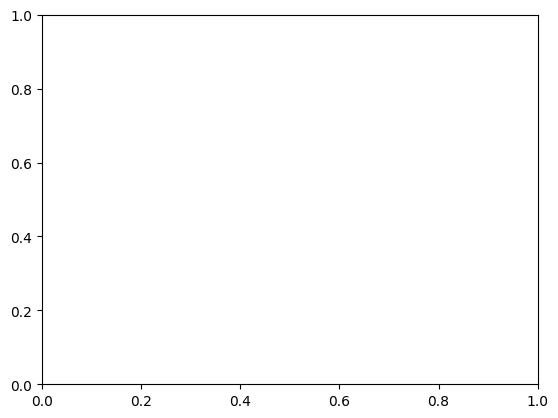

In [73]:
plt.figure()


plt.barh( sexo , valores , color = "orange")


plt.show();

Hay un valor dentro de sex con la categoria lli que corresponde a un solo registro.

2) ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.


In [65]:
x = [df.isnull().sum()]
x

[case_number       1
 unnamed:_0        0
 year              0
 type              4
 country          40
 area            408
 location        488
 activity        511
 name            200
 sex             550
 age            2666
 time           3180
 species        2705
 href              0
 dtype: int64]

In [58]:
labels = df.columns

In [66]:

plt.figure()


plt.pie(, labels, #autopct= '%1.2f%%')

#mostramos al gráfica
plt.show();

SyntaxError: invalid syntax (1085187553.py, line 7)

3) ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?
Filtrad los datos para quedarnos solo con los datos de USA.


4) ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


5) En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.


6) Filtrad los datos para Spain:


- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.
